<p style="font-weight: bold;">EOS 312 - Lab 7 - Alkalinity</p> <br>
Group D - Delirious Dolphin Disciples <br>

recall: $Alk_{std}=2[CO_3^{2-}]+[HCO_3^{-}]+[B(OH)_4^-]$

Contents: <br>
1 $\to$ Plot of 2024 and 2025 alkalinity data at S2.5 and S2 respectively <br>
2 $\to$ Determine the concentration of acid by trial and error <br>
3 $\to$ Calculate alkalinity at S2.5 using the same acid concentration <br>
4 $\to$ Plot alkalinity at S2.5 against depth and compare to 2024 data <br>



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import eos312labtools as tb # tb = tool-box
import pandas as pd

In [ ]:
# import previous 2024, 2025, and 2026 datasets
df = pd.read_csv('EOS312_Chem_Jan2026.csv', header=[0], skiprows=[1])
df_2025 = pd.read_csv('EOS312_Chem_Jan2025.csv', header=[0], skiprows=[1])
df_2024 = pd.read_csv('EOS312_Chem_Jan2024.csv', header=[0], skiprows=[1])

df_25_S2 = df_2025[df_2025['Station']== 'S2   ']
df_25_plotS2 = df_25_S2[df_25_S2['alkalinity'].notna()]

df_24_S25 = df_2024[df_2024['Station']== 'S2.5 ']
df_24_plotS25 = df_24_S25[df_24_S25['alkalinity'].notna()]

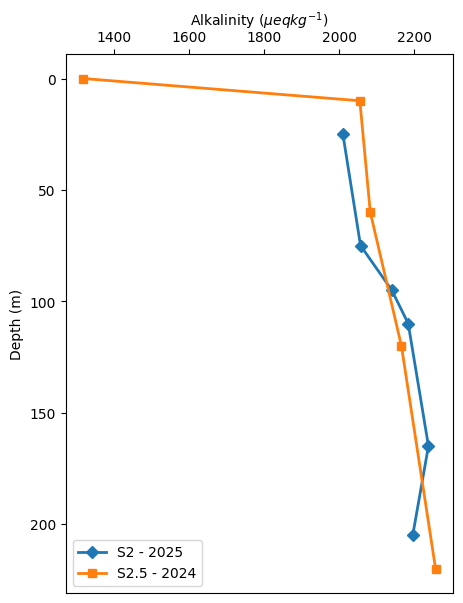

In [ ]:
# 1. plot last years' data at S2 and S2.5

plt.figure(figsize=(5, 7))
plt.plot(df_25_plotS2['alkalinity'], df_25_plotS2['Depth'], marker='D', linewidth='2', label='S2 - 2025')
plt.plot(df_24_plotS25['alkalinity'], df_24_plotS25['Depth'], marker='s', linewidth='2', label='S2.5 - 2024')
plt.xlabel(r'Alkalinity ($\mu eqkg^{-1}$)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax = plt.gca()
ax.xaxis.set_label_position('top')
plt.legend()
plt.show()


In [ ]:
# import this year's data required to calculate alkalinity at S2.5

ds = pd.read_csv('GroupD_AlkCalc', header=[0], skiprows=[1])

df_ref = ds[ds['Station']== 'ref']
df_S25 = ds[ds['Station']== 'S2.5 ']

In [ ]:
# 2. determine the concentration of the acid by trial and error!

# ref_alkalinity = 2000 μeq/kg or something like that

ref_acid_vol = df_ref['vol_acid']             # ml
ref_emf_values = df_ref['emf_values']         # mV
ref_sample_mass = df_ref['sample_mass']       # g
ref_titration_temp = df_ref['titration_temp'] # °C
ref_salinity = df_ref['salinity']             # PSS-78
ref_acid_conc = 0.05                          # mol/kg

ref_alk = tb.AlkCalc(ref_acid_vol, ref_emf_values, ref_sample_mass, ref_titration_temp, ref_salinity, ref_acid_conc)

print(f"Alkalinity of reference material = {ref_alk} μeq/kg")


In [ ]:
# 3. calculate alkalinity at S2.5 using the same acid concentration

alkalinity = []
depth = df_S25['depths'].unique()

for i in range(len(depth)):
    df_S25_i = df_S25[df_S25['depths'] == depth[i]]

    S25_acid_vol = df_S25_i['vol_acid']             # ml
    S25_emf_values = df_S25_i['emf_values']         # mV
    S25_sample_mass = df_S25_i['sample_mass']       # g
    S25_titration_temp = df_S25_i['titration_temp'] # °C
    S25_salinity = df_S25_i['salinity']             # PSS-78
    
    alk = tb.AlkCalc(S25_acid_vol, S25_emf_values, S25_sample_mass, S25_titration_temp, S25_salinity, ref_acid_conc)
    
    alkalinity.append(alk)

print(alkalinity)


In [ ]:
# 4. plot alkalinity at S2.5 against depth and compare to 2024 data

plt.figure(figsize=(5, 7))
plt.plot(alkalinity, depth, marker='D', linewidth='2', label='S2.5 - 2026')
plt.plot(df_24_plotS25['alkalinity'], df_24_plotS25['Depth'], marker='s', linewidth='2', label='S2.5 - 2024')
plt.xlabel(r'Alkalinity ($\mu eqkg^{-1}$)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax = plt.gca()
ax.xaxis.set_label_position('top')
plt.legend()
plt.show()